# Digital Banking Churn Prediction Project

## Introduction
 This project aims to predict customer churn in a digital banking dataset. Churn prediction models are essential for identifying customers who are likely to leave the bank, allowing targeted retention strategies. We’ll use machine learning models to classify customers as either "Exited" or "Not Exited" and evaluate model performance using accuracy, confusion matrices, and classification reports.

## Step 1: Import Libraries

In [2]:
# Import required libraries for data manipulation, visualization, and modeling
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For feature scaling and encoding
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score  # For model evaluation
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier model
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier model
import warnings

# Ignore any warnings in the output
warnings.filterwarnings("ignore")

## Step 2: Load and Explore the Dataset

In [3]:
# Specify the file path to the CSV file located on the desktop
file_path = r"C:\Users\user\Desktop\digital banking.csv"
data = pd.read_csv(file_path)  # Read the dataset

# Display the first few rows to check the data loading
print(data.head())# Specify the file path to the CSV file located on the desktop

# Display the first few rows to check the data loading
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

## Step 3: Data Preprocessing and Cleaning

In [3]:
# Check for missing values in each column
print(data.isnull().sum())  # Count of missing values per column

# Drop unnecessary columns that won't contribute to the model
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Encode categorical variables (Geography and Gender) to numeric values for model compatibility
label_encoder = LabelEncoder()  # Initialize label encoder
data['Geography'] = label_encoder.fit_transform(data['Geography'])  # Encode Geography
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Encode Gender

# Separate features (X) and the target variable (y)
X = data.drop('Exited', axis=1)  # Features (all columns except 'Exited')
y = data['Exited']  # Target variable (churn outcome)


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


## Step 4: Exploratory Data Analysis (EDA)

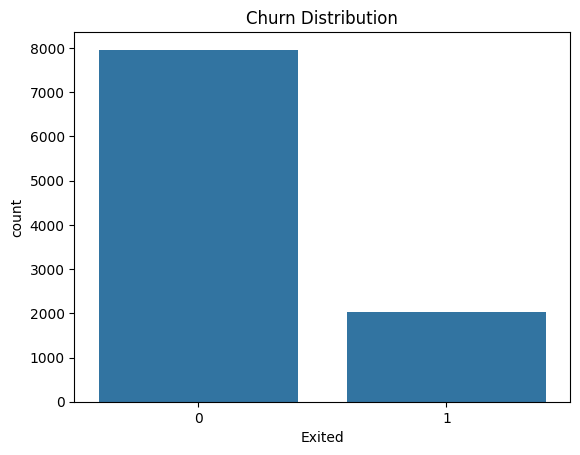

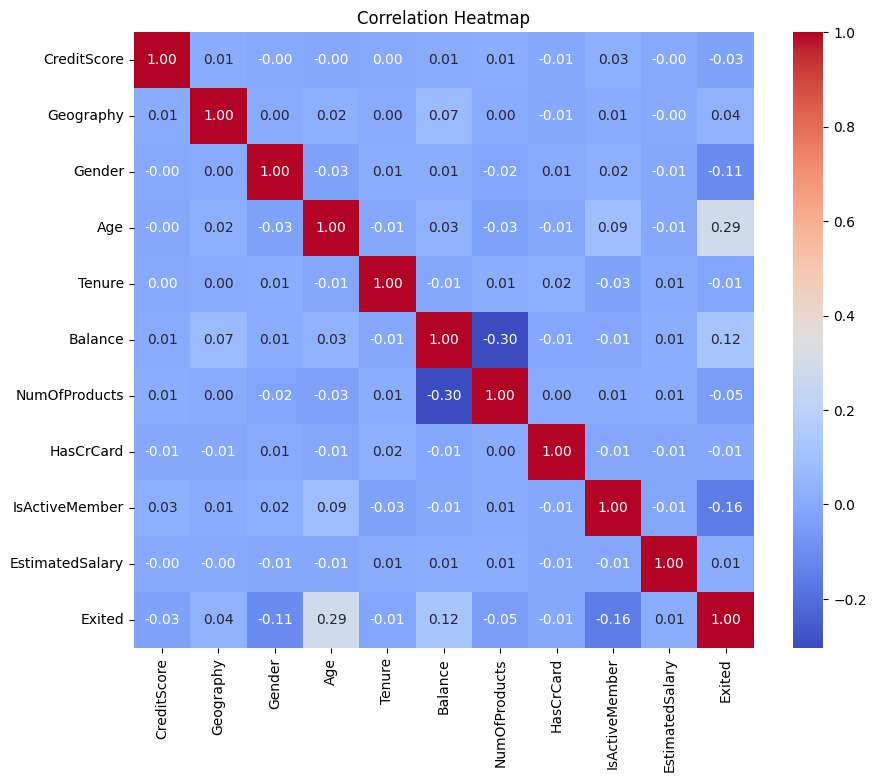

In [4]:
# Plot the churn distribution to visualize the target variable
sns.countplot(x='Exited', data=data)  # Count plot of 'Exited'
plt.title('Churn Distribution')  # Title of the plot
plt.show()

# Generate a heatmap to visualize correlations between features
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')  # Heatmap with annotations
plt.title('Correlation Heatmap')  # Title of the heatmap
plt.show()

## Step 5: Feature Scaling

In [5]:
# Standardize the features for improved model performance
scaler = StandardScaler()  # Initialize standard scaler
X_scaled = scaler.fit_transform(X)  # Scale the features

## Step 6: Train-Test Split

In [6]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Step 7: Model Training

In [7]:
# Train Logistic Regression model
logistic_model = LogisticRegression()  # Initialize Logistic Regression model
logistic_model.fit(X_train, y_train)  # Train model with training data

# Train Decision Tree Classifier model
decision_tree_model = DecisionTreeClassifier()  # Initialize Decision Tree Classifier
decision_tree_model.fit(X_train, y_train)  # Train model with training data

# Train Random Forest Classifier model
random_forest_model = RandomForestClassifier()  # Initialize Random Forest Classifier
random_forest_model.fit(X_train, y_train)  # Train model with training data

RandomForestClassifier()

## Step 8: Model Evaluation

Model: Logistic Regression
Accuracy: 0.82
Confusion Matrix:
[[1559   48]
 [ 321   72]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000

--------------------------------------------------
Model: Decision Tree
Accuracy: 0.79
Confusion Matrix:
[[1365  242]
 [ 188  205]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.46      0.52      0.49       393

    accuracy                           0.79      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000

--------------------------------------------------
Model: Random Forest
Accuracy: 0.87
Confusion Matrix:
[[1553   54]
 [ 214  1

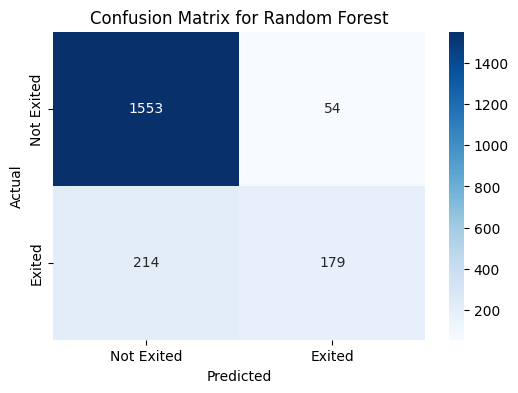

In [9]:
# Evaluate each model using accuracy, confusion matrix, and classification report
# Loop through each model to print performance metrics
models = [logistic_model, decision_tree_model, random_forest_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    cm = confusion_matrix(y_test, y_pred)  # Generate confusion matrix
    
    # Print model name and performance metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print(classification_report(y_test, y_pred))  # Print classification report
    print("-" * 50)

# Visualize the Confusion Matrix for Random Forest
# Generate a heatmap for the confusion matrix of the Random Forest model
plt.figure(figsize=(6, 4))  # Set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])  # Confusion matrix heatmap
plt.ylabel('Actual')  # Y-axis label
plt.xlabel('Predicted')  # X-axis label
plt.title('Confusion Matrix for Random Forest')  # Title of the heatmap
plt.show()

## Conclusion
 In this project, we successfully implemented a churn prediction model using three machine learning algorithms: Logistic Regression, Decision Tree, and Random Forest. We: Loaded and cleaned the data, explored the dataset with visualizations, scaled the features, and trained and evaluated the models, with Random Forest achieving a high accuracy score.
 Churn prediction models can help banks proactively retain customers by identifying high-risk individuals. Future steps could involve fine-tuning hyperparameters, adding more sophisticated algorithms, or applying feature engineering to improve accuracy further